<a href="https://colab.research.google.com/github/MohammadErfanRashidi/Time-Series-Forecasting-with-an-ARIMA-model/blob/main/Time%20Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!pip install yfinance statsmodels matplotlib

[*********************100%***********************]  1 of 1 completed


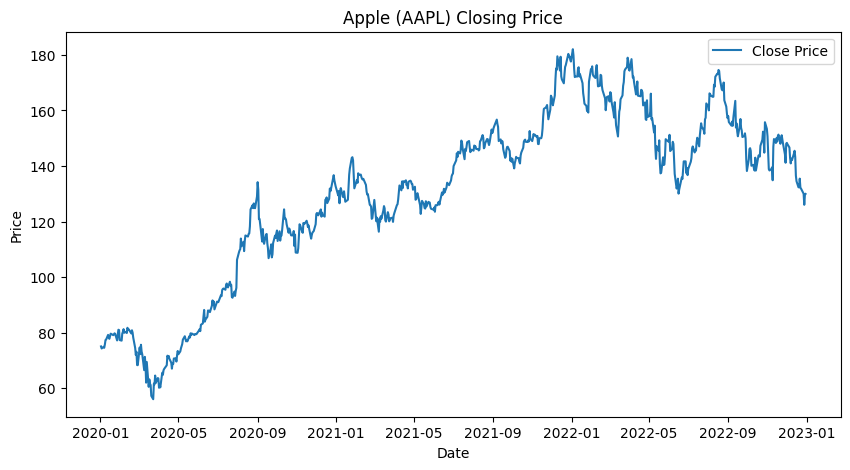

In [27]:
import yfinance as yf
import matplotlib.pyplot as plt

# Load stock data
stock_data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
stock_data = stock_data[['Close']]  # We will use the 'Close' price for forecasting

# Plot the closing price
plt.figure(figsize=(10, 5))
plt.plot(stock_data['Close'], label='Close Price')
plt.title("Apple (AAPL) Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

ADF Statistic: -1.8953789647960475
p-value: 0.33423810459018777


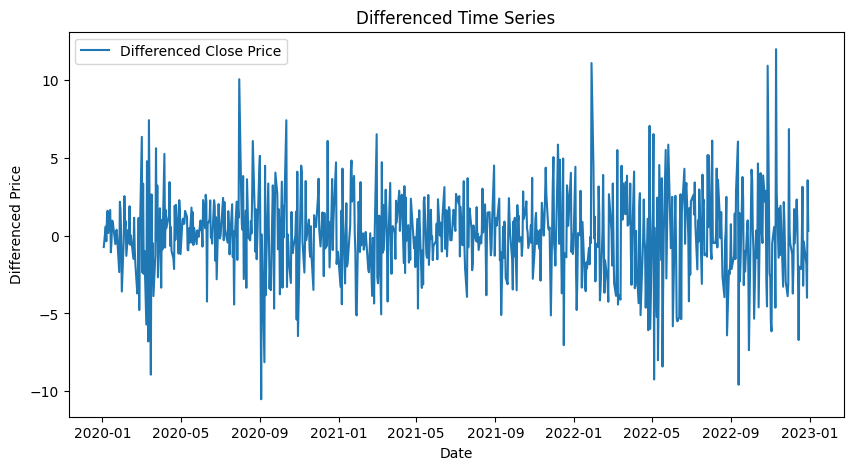

In [28]:
from statsmodels.tsa.stattools import adfuller

# Check for stationarity
result = adfuller(stock_data['Close'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# If p-value > 0.05, data is non-stationary; apply differencing
stock_data_diff = stock_data['Close'].diff().dropna()

# Plot differenced data
plt.figure(figsize=(10, 5))
plt.plot(stock_data_diff, label='Differenced Close Price')
plt.title("Differenced Time Series")
plt.xlabel("Date")
plt.ylabel("Differenced Price")
plt.legend()
plt.show()

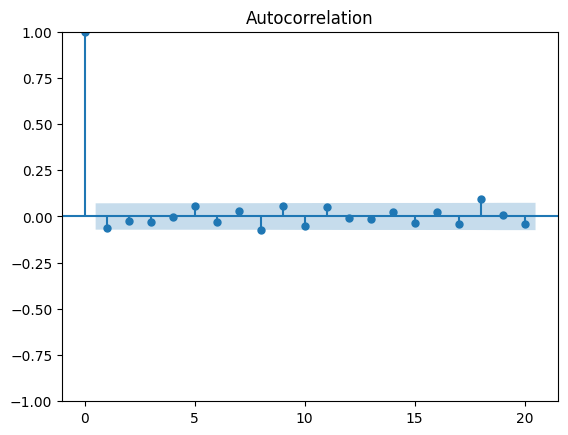

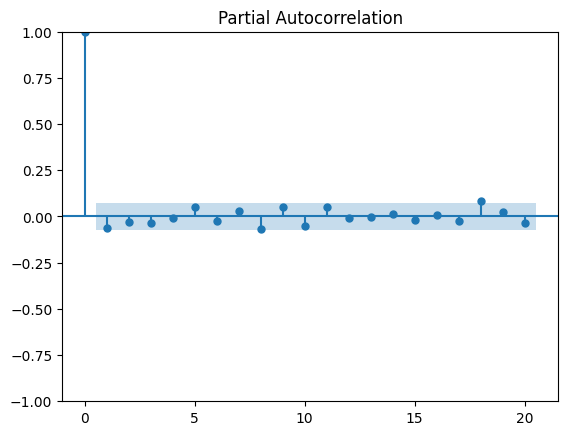

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plot_acf(stock_data_diff, lags=20)
plot_pacf(stock_data_diff, lags=20)
plt.show()

In [30]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(stock_data['Close'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  756
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1844.760
Date:                Sun, 17 Nov 2024   AIC                           3695.519
Time:                        10:03:13   BIC                           3709.400
Sample:                             0   HQIC                          3700.866
                                - 756                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3967      0.369      1.076      0.282      -0.326       1.120
ma.L1         -0.4613      0.360     -1.282      0.200      -1.167       0.244
sigma2         7.7587      0.312     24.904      0.0

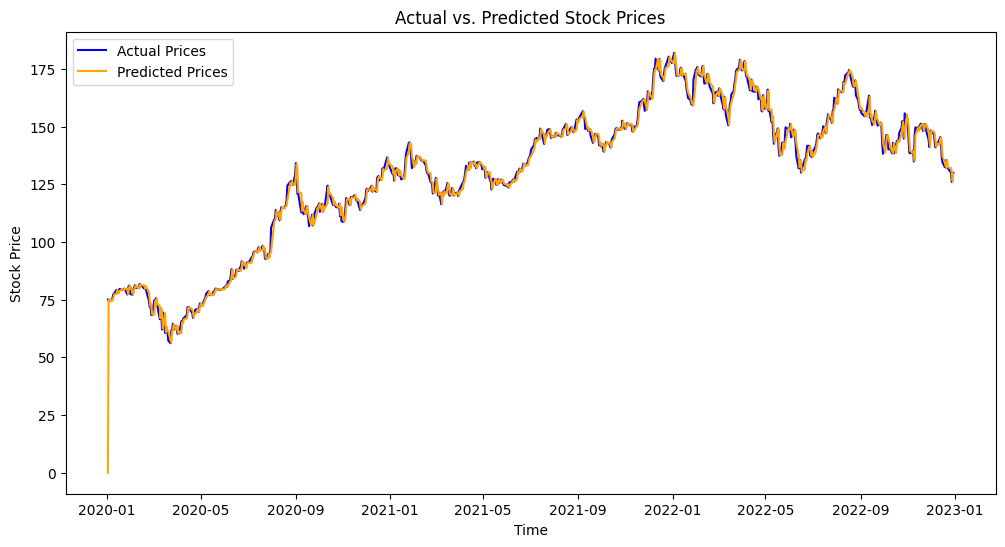

Mean Absolute Error (MAE): 2.168292737453209


In [34]:
import matplotlib.pyplot as plt

# Forecasting periods
forecast_periods = len(stock_data)  # Forecasting the same number of points as the original data

# Generate in-sample predictions (one-step-ahead forecasts) to compare with actual values
predictions = model_fit.predict(start=0, end=forecast_periods-1, typ='levels')

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='orange')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()

# Calculate Mean Absolute Error (MAE) for comparison
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(stock_data['Close'], predictions)
print(f"Mean Absolute Error (MAE): {mae}")

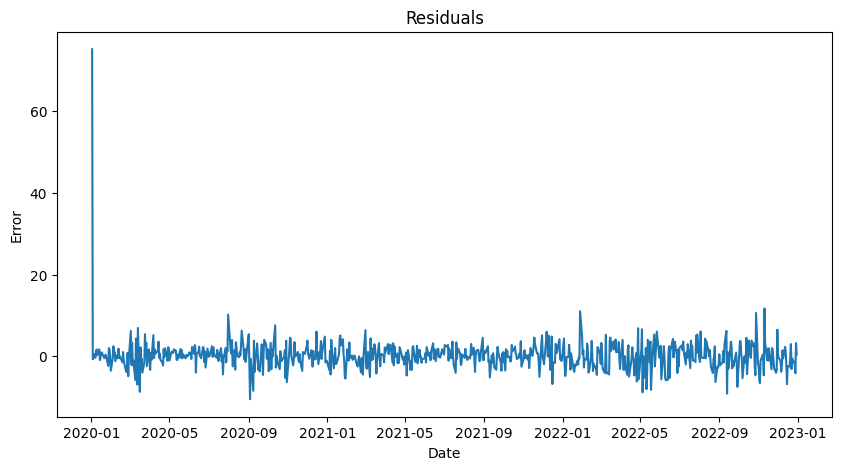

Mean Absolute Error (MAE): 2.168292737453209


In [32]:
import numpy as np

# Calculate residuals
residuals = model_fit.resid

# Plot residuals
plt.figure(figsize=(10, 5))
plt.plot(residuals)
plt.title("Residuals")
plt.xlabel("Date")
plt.ylabel("Error")
plt.show()

# Calculate Mean Absolute Error (MAE)
mae = np.mean(abs(residuals))
print(f"Mean Absolute Error (MAE): {mae}")